## 1) Importing All Modules

In [24]:
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
from skimage.measure.entropy import shannon_entropy
from skimage.filters.rank import entropy
from skimage.morphology import disk
from PIL import Image
from scipy.ndimage import gaussian_filter




from pylab import rcParams
rcParams['figure.figsize'] = 20, 20




### Defining Custom Histogram Function . We Iterate each pixel, and Add +1 on the list with the Index being the Color scanned on the pixel

In [25]:
def get_histogram(image, bins):
    histogram = np.zeros(bins)
    for pixel in image:
        histogram[pixel] += 1

    return histogram

### This is the implementation of cumsum , where we keep adding Pixels intensity as we go . eventually , the last value in list has length of all pixels combined

In [26]:
def cumsum(Hist):
    Hist = iter(Hist)
    b = [next(Hist)]
    for i in Hist:
        b.append(b[-1] + i)
    return np.array(b)

### Task1 - Convert to greyscale


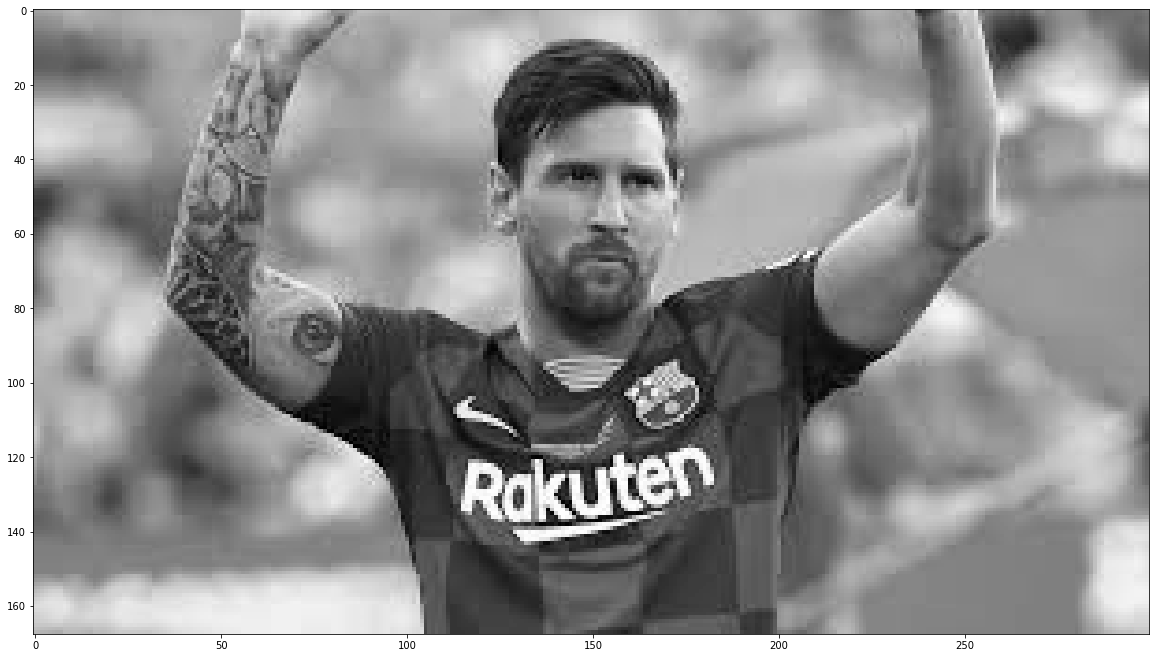

In [27]:

Messi = Image.open('Messi.jpeg').convert('L')
plt.imshow(Messi,cmap='gray')
plt.show()

### Task2 - Lower its size



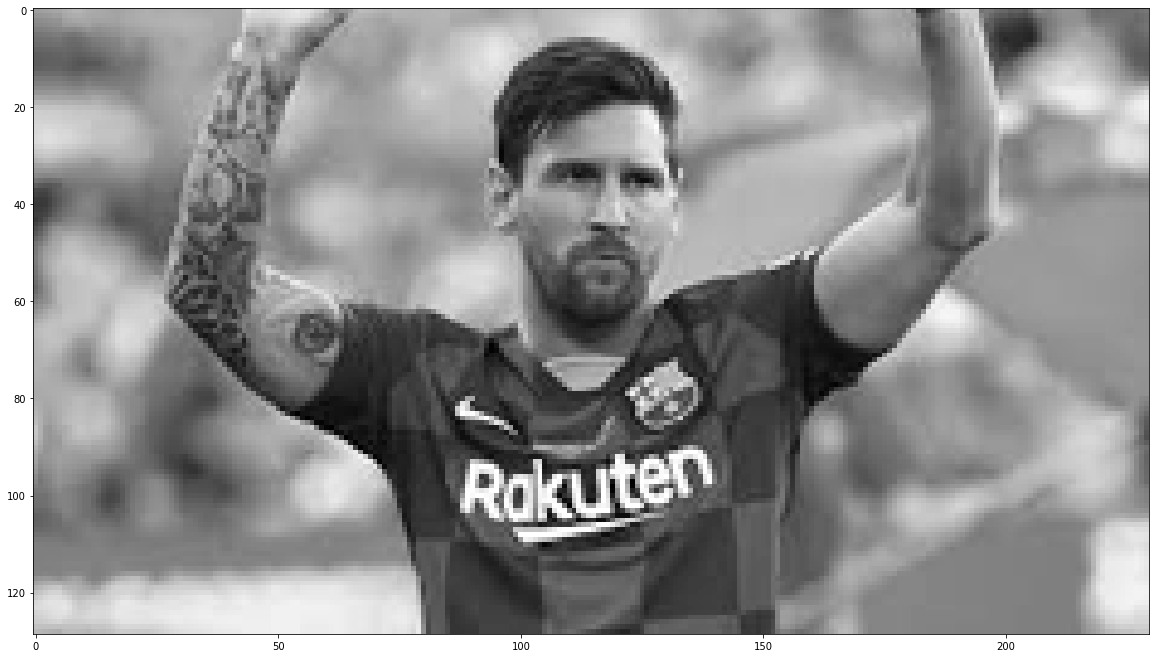

In [28]:
H,L=(np.asarray(Messi)).shape

Messi = Messi.resize((int(L/1.3),int(H/1.3)), Image.ANTIALIAS)
Messi=np.asarray(Messi)
plt.imshow(Messi,cmap='gray')
plt.show()

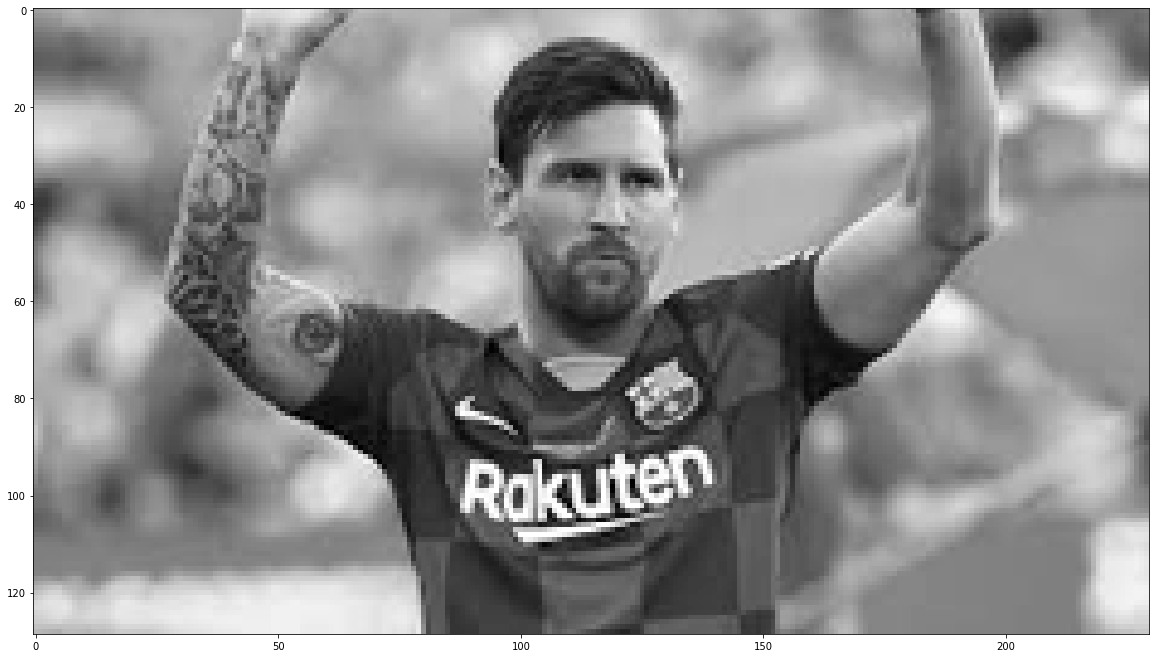

In [29]:
# Messi=gaussian_filter(Messi, sigma=3)
Messi=Messi.astype(int)
plt.figure(num='GaussianBlur')
plt.imshow(Messi,cmap='gray')
plt.show()

### Applying Histogram (by using the functions defined above)

In [30]:

FlattenedImage=np.reshape(Messi,(Messi.shape[0]*Messi.shape[1]))

hist = get_histogram(FlattenedImage, 256)


cumsumValues = cumsum(hist)

### re-normalize cumsum values to be between 0-255

In [31]:
nj = (cumsumValues - cumsumValues.min()) * 255
N = cumsumValues.max() - cumsumValues.min()

### re-normalize the cdf

In [32]:
cumsumValues = nj / N

cumsumValues = cumsumValues.astype('uint8')

EqualizedImage = cumsumValues[FlattenedImage]
EqualizedImage = np.reshape(EqualizedImage, Messi.shape)


### Visualizing Equalized Image

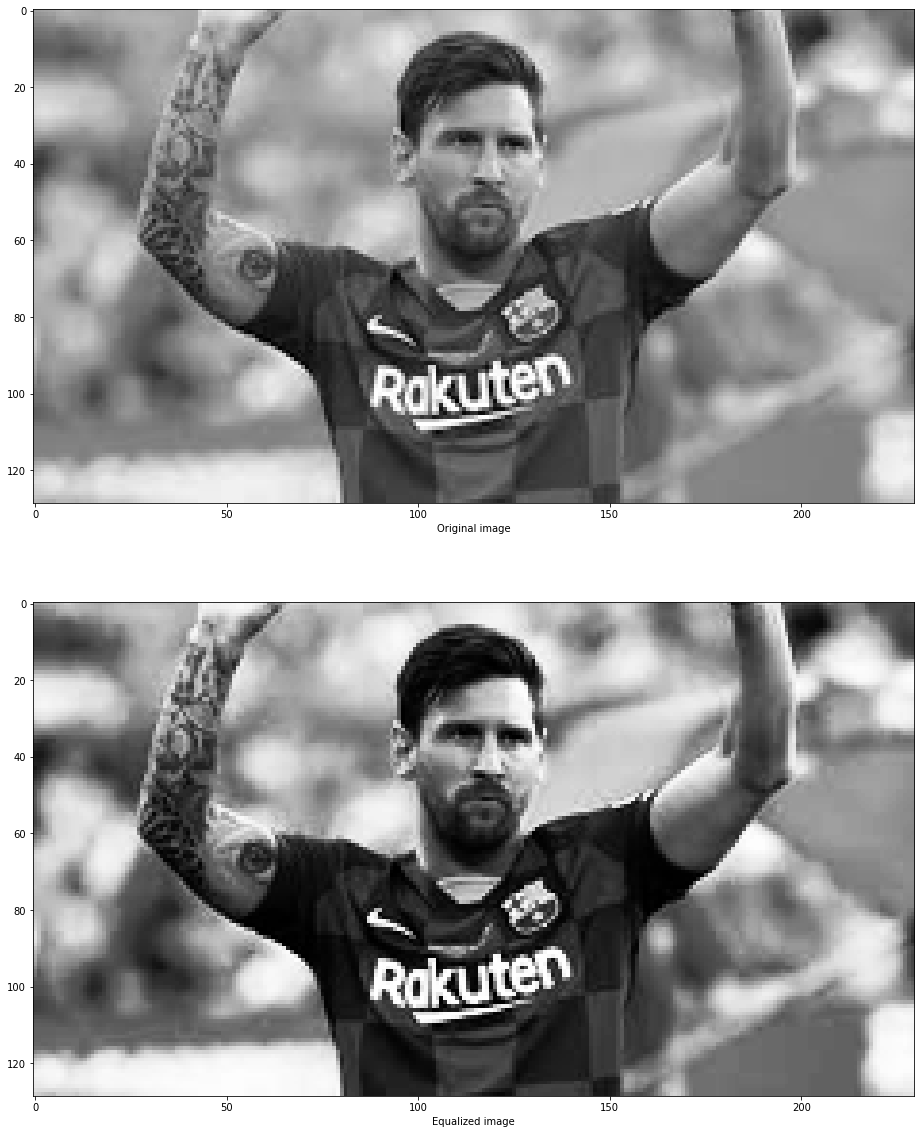

In [33]:
plt.subplot(2,1,1),plt.imshow(Messi,cmap = 'gray')
plt.xlabel('Original image')
plt.subplot(2,1,2),plt.imshow(EqualizedImage,cmap = 'gray')
plt.xlabel('Equalized image')
plt.show()




###Visualizing previous and After Equalization Histogram

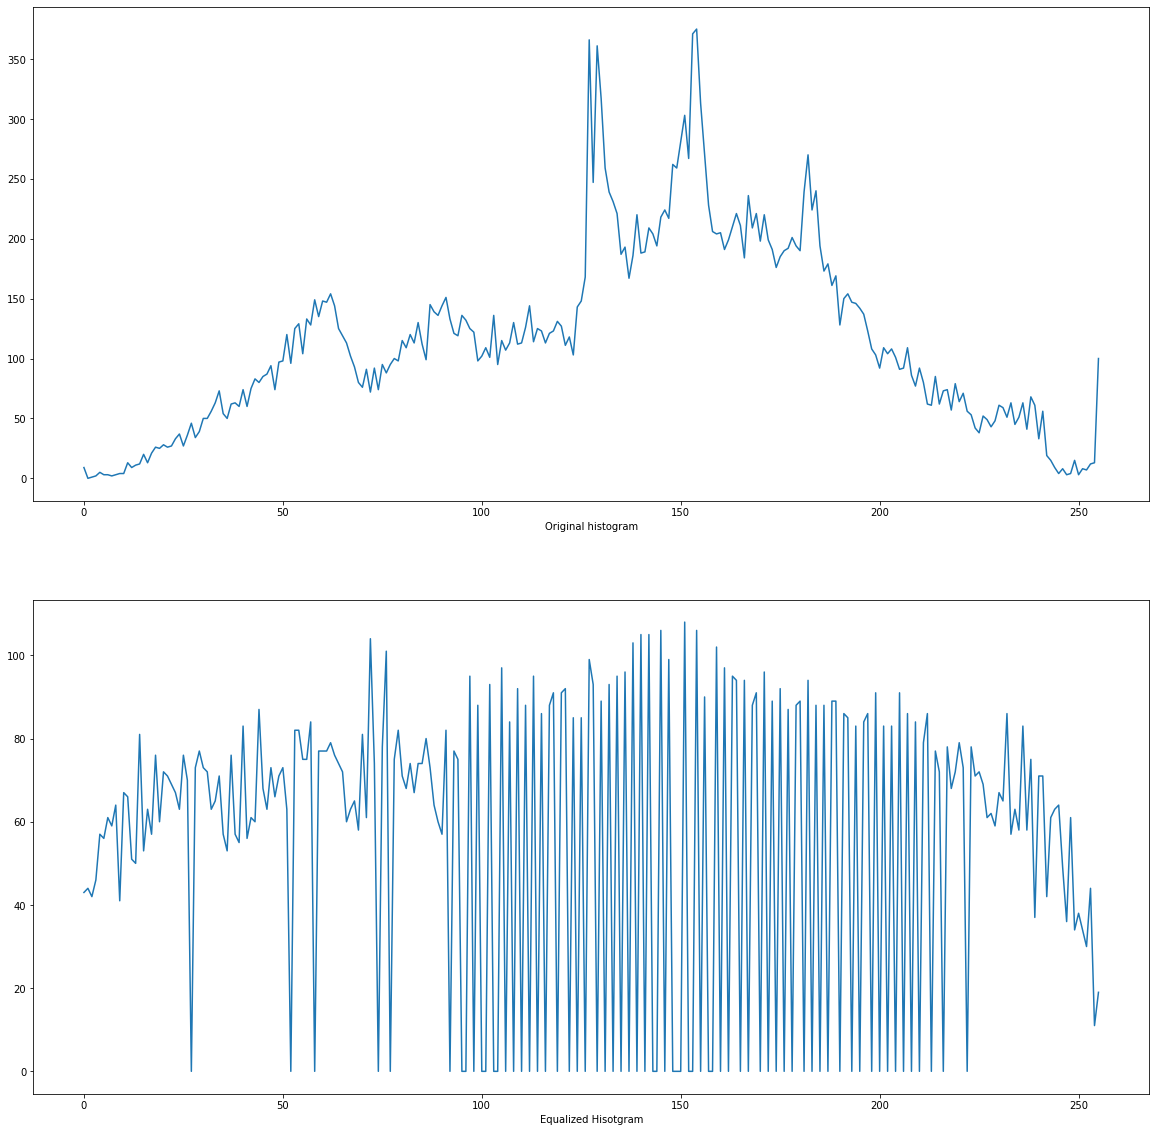

In [34]:
hist2 = get_histogram(EqualizedImage, 256)

plt.figure(num='Histogram Comparison')
plt.subplot(2,1,1),plt.plot(hist)
plt.xlabel('Original histogram')
plt.subplot(2,1,2),plt.plot(hist2)
plt.xlabel('Equalized Hisotgram')
plt.show()

### Now we Calculate the Entropy of Before and After Image(Equalized image)

### Entropy is a statistical measure of randomness that can be used to characterize the texture of the input image.

### Entropy is defined as -sum(p.*log2(p)), where p contains the normalized histogram counts returned from our get_histogram

In [40]:
###Defining our own Entropy Calculation
def entropyCalculator(img):
    marg = np.histogramdd(np.ravel(img), bins = 256)[0]/img.size
    marg = list(filter(lambda p: p > 0, np.ravel(marg)))
    entropy = -np.sum(np.multiply(marg, np.log2(marg)))
    return entropy
    

7.651043434196062


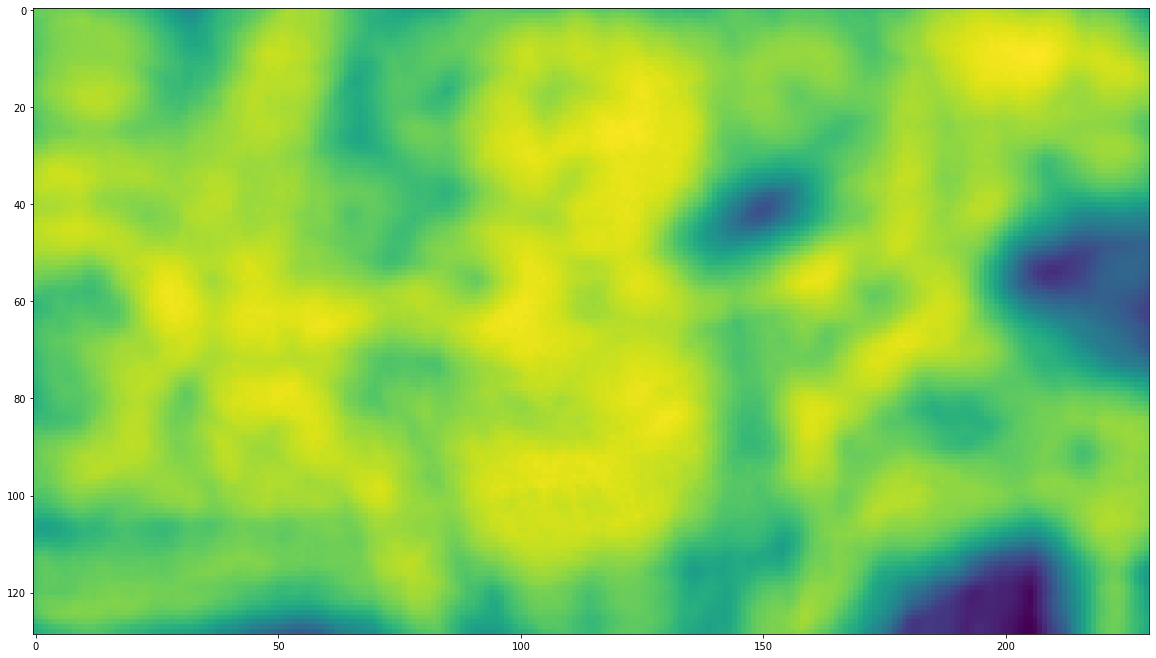

In [41]:
print(entropyCalculator(Messi)) 

entr_img = entropy(Messi, disk(10))
plt.imshow(entr_img, cmap='viridis')
plt.show()



7.457208366564299


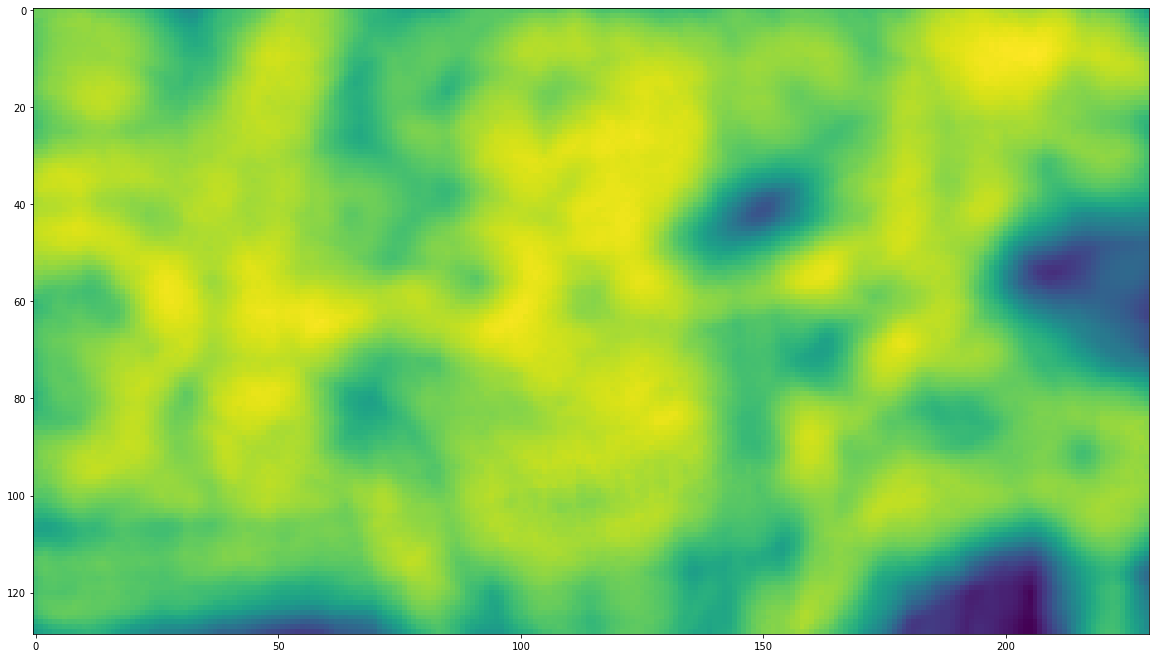

In [43]:
print(entropyCalculator(EqualizedImage)) 

entr_img = entropy(EqualizedImage, disk(10))
plt.imshow(entr_img, cmap='viridis')
plt.show()

### We can Observe that the Entropy of the Image reduced after the Histogram Equalization was applied to our images